# Support Vector Classifiers
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 5

[Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_05_ML_Landscape.png)

Support Vector Machines were first conceived in the 1960's. However, new ideas and technologies allowed it to reappear in the 1990's and have become very popular.

## The Concept behind Support Vector Classifiers
Imagine you have two datasets. We want to draw a line that separates them. We can do this using other classification methods, like logistic regression. We create a line, evaluate its performance, then shift it by a tiny step to improve the model. We continue until we have a separation.

However, many lines can work. But which will be the best line? Below are two graphs of the Iris dataset. Which line is the better classifier?

Text(0, 0.5, 'Petal Width (cm)')

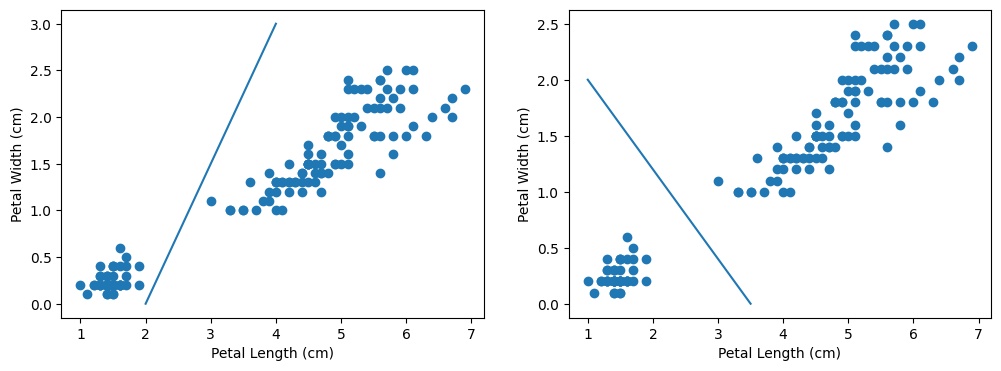

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(iris['data'][:,2], iris['data'][:,3])
ax[0].plot([2,4],[0.0,3.0])
          
ax[0].set_xlabel('Petal Length (cm)')
ax[0].set_ylabel('Petal Width (cm)')

ax[1].scatter(iris['data'][:,2], iris['data'][:,3])
ax[1].plot([3.5,1],[0.0,2.0])

ax[1].set_xlabel('Petal Length (cm)')
ax[1].set_ylabel('Petal Width (cm)')

The one on the right is better. Why?
* Optimize the space between them
* Fewer misclassifications

The idea of the __Support Vector Machines__ is to optimize the space between the groups.

* Two classes have a gap between them
* Draw a line to separate the datasets
  * The distance from the closest datapoint to the separator is known as the __margin__
  * When the separator is in the middle, the margin is maximized for both datasets. This is known as the __maximal margin classifier__ (mmc)

Using a soft margin is a machine learning model known as a __soft margin classifier__, more commonly known as a __Support Vector Classifier__ (SVC)
* With 2-dimensional data, the SVC is a line
* With 3-dimensional data, the SVC is a plane
* ...
* General term is a *hyperplane* that separates the groups
  * With n dimensions, the SVC has n-1 dimensions

### How does it work?
We begin with a random line with two lines around it (our margin). As we adjust the position of the line, we also widen the margin. The result is a margin that "baloons" into place.

To understand the process, let's first look at how the lines work.
* What is the difference between the lines $ax + by + c = 0$ and $2ax + 2by + 2c = 0$?
  * No difference. They are the same line (that means the $(x,y)$ pairs give the same solution).
* Create margins
  * $ax + by + c = 1$ and $ax + by + c = -1$
  * What happens when we double these equations to $2ax + 2by + 2c = 1$ and $2ax + 2by + 2c = -1$? (demonstrate on Desmos)
  * So, we will update the settings (using Gradient Descent) and also expand the margin at the same time

### SVC algorithm
1. Random line at $ax + by + c = 0$
    * Also make margins at $ax + by + c = 1$ and $ax + by + c = -1$
2. Determine how many epochs (repetitions) for training the model (that is, how many little steps are we going to take?)
3. Pick a learning rate $\eta$ (this is your step size)
    * We will set the expanding rate to $1-\eta$
4. Repeat this loop $n$ times, where $n$ is the number of epochs
    1. Classify all points to the left in group 0 and to the right in group 1
    2. Pick a random point $(p,q)$
    3. Determine if the point is correctly classified
        * If the point is correctly classified, do nothing
        * If the point is in 0 but classified as 1,
            * Update $a_{n+1} = a_n - \eta p$
            * Update $b_{n+1} = b_n - \eta q$
            * Update $c_{n+1} = c_n - \eta$
        * If the point is in 1 but classified as 0,
            * Update $a_{n+1} = a_n + \eta p$
            * Update $b_{n+1} = b_n + \eta q$
            * Update $c_{n+1} = c_n + \eta$
    4. Increase margin (can be combined with step 3)
        * $a = (1-\eta)a$
        * $b = (1-\eta)b$
        * $c = (1-\eta)c$

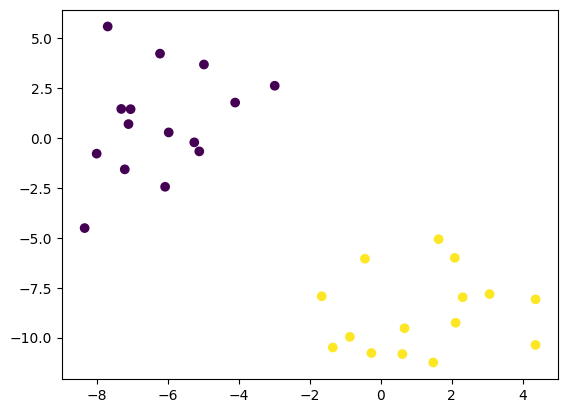

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_pts = 30
X,y = make_blobs(n_samples = n_pts, n_features=2, centers=2, cluster_std=2, random_state=16)

plt.scatter(X[:,0],X[:,1], c=y)

In [4]:
y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
### My original code
### Look at the next cell for the same process but with better animation from AI

import numpy as np
# Random starting point for lines
a = 1
b = 1
c = 1

# Model training settings
n = 100
eta = 0.01  # 1-eta = expanding rate

# Train the model
x = np.linspace(-12,12,100)


for i in range(n):
    L = (-c - a*x) / b       # y = L; ax + by + c = 0
    L0 = (1 - c - a*x) / b  # y = L; ax + by + c = -1
    L1 = (-1 - c - a*x) / b   # y = L; ax + by + c = 1

    pt = np.random.randint(0,n_pts)

    Lx = a*X[pt,0] + b*X[pt,1] + c # Lx < 0 classifies point as 0 -- Lx > 0 classifies point as 1
    # Classified as 0 but should be 1
    if (Lx < 1) & (y[pt] == 1):
        a += (eta * X[pt,0])
        b += (eta * X[pt,1])
        c += eta
    
    # Classified as 1 but should be 0
    if (Lx > -1) & (y[pt] == 0):
        a -= (eta * X[pt,0])
        b -= (eta * X[pt,1])
        c -= eta
    
    a *= (1-eta)
    b *= (1-eta)
    c *= (1-eta)
    
    # if np.mod(i,10) == 0:
    #     fig, ax = plt.subplots(figsize=(12,8))
    #     ax.scatter(X[:,0],X[:,1], c=y)
    #     ax.plot(x,L,'k-')
    #     ax.plot(x,L0,'k--')
    #     ax.plot(x,L1,'k--')
    #     ax.set_xlim(X[:,0].min() - np.abs(X[:,0].min())*0.10, X[:,0].max() + np.abs(X[:,0].max())*0.10)
    #     ax.set_ylim(X[:,1].min() - np.abs(X[:,1].min())*0.10, X[:,1].max() + np.abs(X[:,1].max())*0.10)
    #     plt.show()
    #     input("Press Enter to continue...")
    #     fig.canvas.draw()
    #     fig.canvas.flush_events()
    #     plt.close(fig)

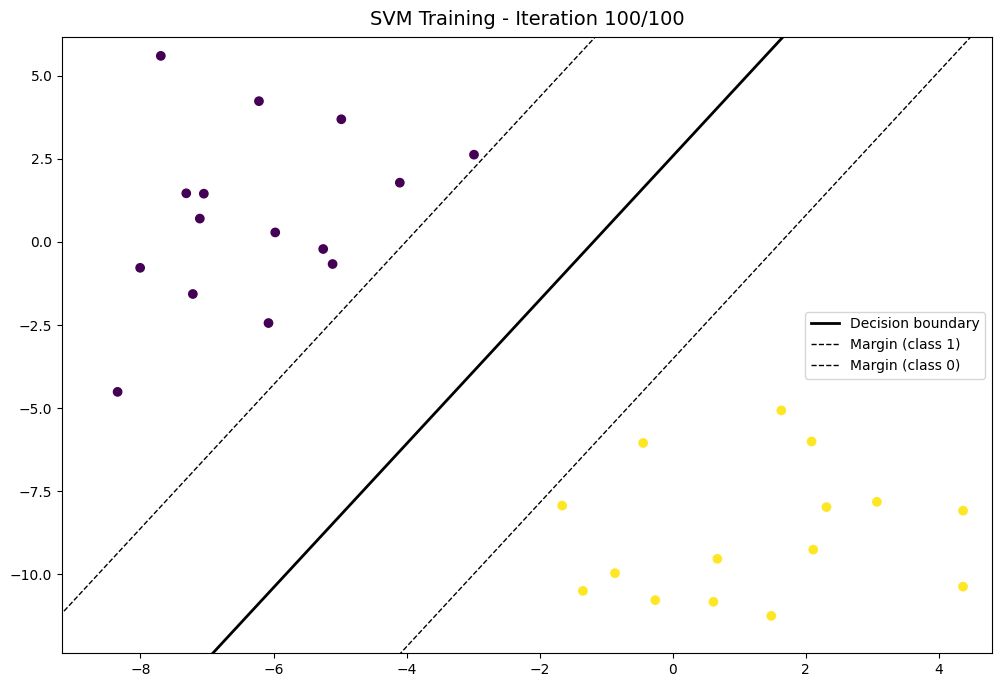

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Random starting point for lines
a = 1
b = 1
c = 1

# Model training settings
n = 100
eta = 0.01  # 1-eta = expanding rate

# Train the model
x = np.linspace(-12, 12, 100)

# Store the parameters at each step for animation
history = []

for i in range(n+1):
    pt = np.random.randint(0, n_pts)
    
    Lx = a*X[pt,0] + b*X[pt,1] + c
    
    # Classified as 0 but should be 1
    if (Lx < 1) & (y[pt] == 1):
        a += (eta * X[pt,0])
        b += (eta * X[pt,1])
        c += eta
    
    # Classified as 1 but should be 0
    if (Lx > -1) & (y[pt] == 0):
        a -= (eta * X[pt,0])
        b -= (eta * X[pt,1])
        c -= eta
    
    a *= (1-eta)
    b *= (1-eta)
    c *= (1-eta)
    
    # Store parameters every 10 iterations
    if np.mod(i, 2) == 0:
        history.append((a, b, c, i))

# Create animation
fig, ax = plt.subplots(figsize=(12, 8))

# Set up the plot limits
ax.set_xlim(X[:,0].min() - np.abs(X[:,0].min())*0.10, X[:,0].max() + np.abs(X[:,0].max())*0.10)
ax.set_ylim(X[:,1].min() - np.abs(X[:,1].min())*0.10, X[:,1].max() + np.abs(X[:,1].max())*0.10)

# Plot the data points (static)
scatter = ax.scatter(X[:,0], X[:,1], c=y)

# Initialize line objects
line_L, = ax.plot([], [], 'k-', linewidth=2, label='Decision boundary')
line_L0, = ax.plot([], [], 'k--', linewidth=1, label='Margin (class 1)')
line_L1, = ax.plot([], [], 'k--', linewidth=1, label='Margin (class 0)')

ax.legend()
title = ax.text(0.5, 1.02, '', transform=ax.transAxes, ha='center', fontsize=14)

def init():
    line_L.set_data([], [])
    line_L0.set_data([], [])
    line_L1.set_data([], [])
    return line_L, line_L0, line_L1, title

def animate(frame):
    a, b, c, iteration = history[frame]
    
    L = (-c - a*x) / b
    L0 = (1 - c - a*x) / b
    L1 = (-1 - c - a*x) / b
    
    line_L.set_data(x, L)
    line_L0.set_data(x, L0)
    line_L1.set_data(x, L1)
    
    title.set_text(f'SVM Training - Iteration {iteration}/{n}')
    
    return line_L, line_L0, line_L1, title

anim = FuncAnimation(fig, animate, init_func=init, frames=len(history), 
                     interval=200, blit=True, repeat=True)

# Display the animation in the notebook
HTML(anim.to_jshtml())

[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



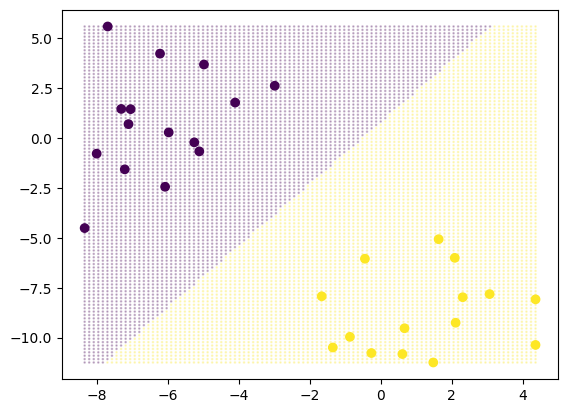

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

###  Create Model  ###
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

###  Fit Model  ###
svc.fit(X,y)
y_pred = svc.predict(X)

###  Evaluate Model  ###
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

X_mesh, Y_mesh = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),100),
                             np.linspace(X[:,1].min(),X[:,1].max(),100))
X_mesh = np.array([X_mesh.flatten(), Y_mesh.flatten()]).T

y_mesh = svc.predict(X_mesh)

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_mesh[:,0],X_mesh[:,1], c=y_mesh, alpha=0.25, marker='.', s=3)
plt.show()

Limited to 2 variables?
This is not limited to 2 variables. The picture changes as we look into more variables, or dimensions. 
* With 2 variables, the margin is formed and the separator down its middle is a line.
* 3 variables creates a margin with a plane down the middle
* 4 variables creates a margin with a space down the middle
* etc.

To abbreviate this, we say that the separator down the middle is a *hyperplane*, meaning a plane of $n$ dimensions.




This margin has two problems:
  1. Only works if data is linearly separable
  2. Sensitive to outliers - If you have a datapoint from one dataset that is near the other dataset, the mmc is decreased and misplaced. New datapoints near the second dataset could be classified in the first dataset

How can we address these problems?
* Bias/Variance tradeoff
  * If we force all points to be correct, we have *low bias*. However, this overfits the data, so our predictions will often be incorrect, giving us a *high variance*
  * If we allow misclassifications, we have *high bias*, but the predictions are more accurate, giving us a *low variance*
* Allow misclassifications (or *margin violations*)
  * When we allow misclassifications, then we call that margin a __soft margin__
* Determine best soft margin
  * Use cross validation

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0, 0.5, 'Petal Width (cm)')

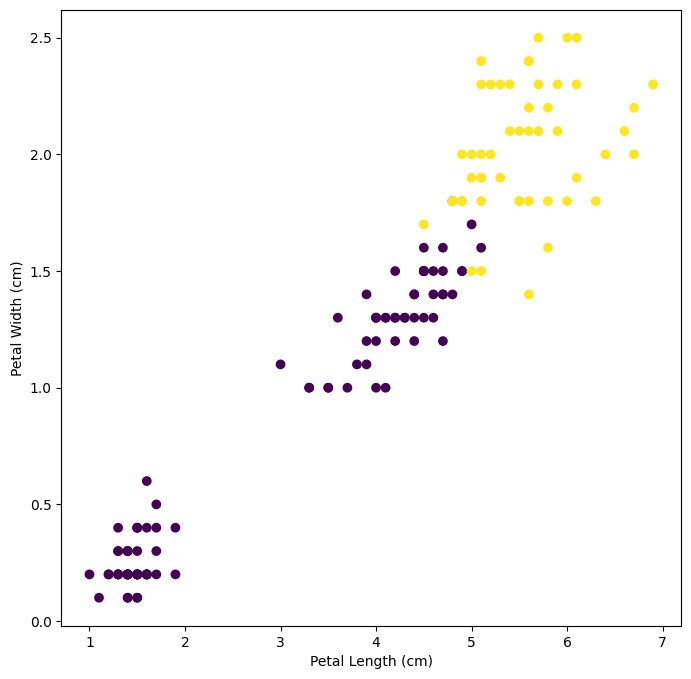

In [ ]:
## Which species? 0 = Setosa, 1 = Versicolor, 2 = Virginica
species = 2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(iris['data'][:,2], iris['data'][:,3], c=(iris['target'] == species))
          
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

## Preprocessing
1. Missing Data - No missing values in this example
2. Encode Categorical Variables - Using original data, no categorical variables
3. Split the data
4. Feature Scaling - Will do in a pipeline with the model

In [ ]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris['data'][:,(2,3)]
y = (iris['target'] == species).astype(np.float64)

## SVC model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svc.fit(X,y)
y_pred = svc.predict(X)

Description of hyperparameters:
* `C` is the regularization parameter - determines the number of misclassifications
  * High C means we regularize more (allow fewer misclassifications) - smaller margins
  * Low C means we regularize less (allow more misclassifications) - larger margins
* `loss` is the loss function
  * None selected by default - we have to set one to run the model
  * `hinge` is the typical loss type

## Evaluate the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(iris['target']==species, y_pred))
print(classification_report(iris['target']==species, y_pred))

[[97  3]
 [ 4 46]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       100
        True       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



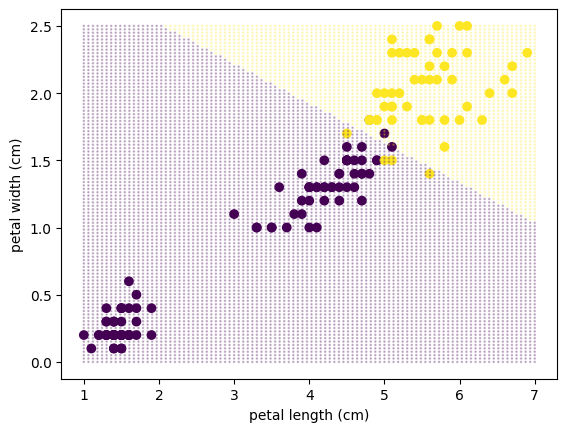

In [ ]:
X_test, Y_test = np.meshgrid(np.linspace(1,7,100), np.linspace(0,2.5,100))
X_test = np.array([X_test.flatten(), Y_test.flatten()]).T

y_pred = svc.predict(X_test)

plt.scatter(iris['data'][:,2], iris['data'][:,3], c=iris['target']==species)
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, alpha=0.25, marker='.', s=3)
plt.show()

### Do it again, but for all three species
Creates a separator and a margin that is compared to both groups

c:\Users\michael.olson2\.virtualenvs\MachineLearning\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


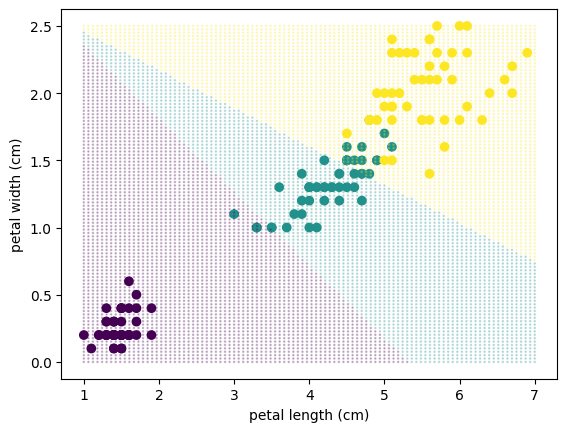

In [ ]:
svc3 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svc3.fit(iris['data'][:,2:],iris['target'])

X_test, Y_test = np.meshgrid(np.linspace(1,7,100), np.linspace(0,2.5,100))
X_test = np.array([X_test.flatten(), Y_test.flatten()]).T

y_pred = svc3.predict(X_test)

plt.scatter(iris['data'][:,2], iris['data'][:,3], c=iris['target'])
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, alpha=0.25, marker='.', s=3)
plt.show()

### Do it again for all three species and all four variables
__*This doesn't look right yet*__

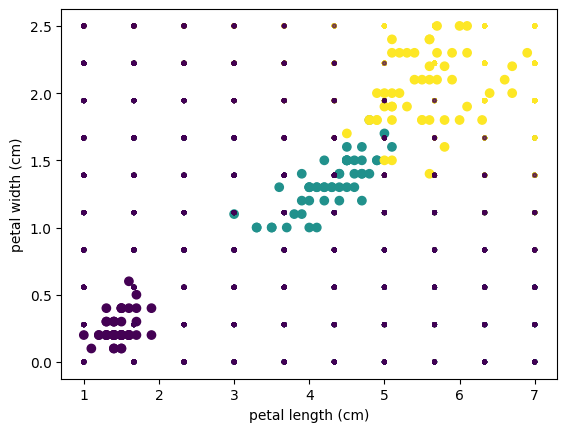

In [ ]:
svc4 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svc4.fit(iris['data'],iris['target'])

X0_test, X1_test, X2_test, X3_test = np.meshgrid(*[np.linspace(4,8,10),np.linspace(2,5,10),np.linspace(1,7,10), np.linspace(0,2.5,10)])
X_test = np.array([X0_test.flatten(), X1_test.flatten(), X2_test.flatten(), X3_test.flatten()]).T

y_pred = svc4.predict(X_test)

plt.scatter(iris['data'][:,2], iris['data'][:,3], c=iris['target'])
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.scatter(X_test[:,2],X_test[:,3], c=y_pred, alpha=0.25, marker='o', s=7)
plt.show()

In [ ]:
print(iris['data'][:,0].min(), iris['data'][:,0].max())
print(iris['data'][:,1].min(), iris['data'][:,1].max())
print(iris['data'][:,2].min(), iris['data'][:,2].max())
print(iris['data'][:,3].min(), iris['data'][:,3].max())

4.3 7.9
2.0 4.4
1.0 6.9
0.1 2.5
